In [67]:
import numpy as np
import matplotlib.pyplot as plt

name_str='uniform-distribution-frequency-65-seed-{}.npz'
sample_list = np.arange(1000,1100,10)
std_w_range = np.arange(0.01,0.4,0.1)
axis_std_w1 = np.arange(0.005, 0.1, 0.015)
axis_std_w2 = np.arange(0.005, 0.1, 0.015)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
train_accuracy_10_samples = np.zeros((10,7,7))
test_accuracy_10_samples = np.zeros((10,7,7))


In [68]:
test1 = np.load('uniform-distribution-frequency-65-seed-1.npz')
print(test1['loss_hist'])

[0.80925251 0.22185046 0.15378836 0.11664884 0.09704601]


0.9227764423076923
0.9328926282051282
0.9328926282051282
0.9303886217948718
0.9408052884615384
0.9565304487179487
0.9540264423076923
0.9407051282051282
0.9360977564102564
0.932792467948718


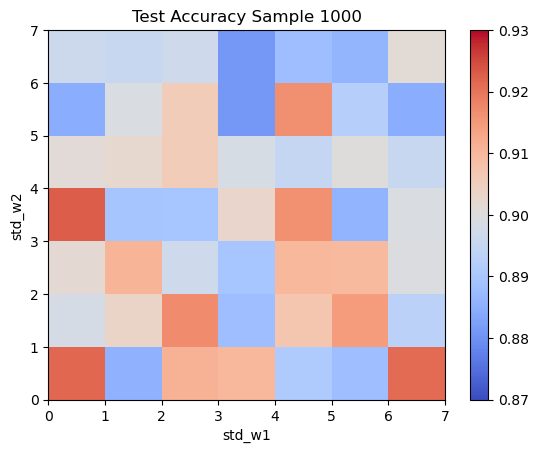

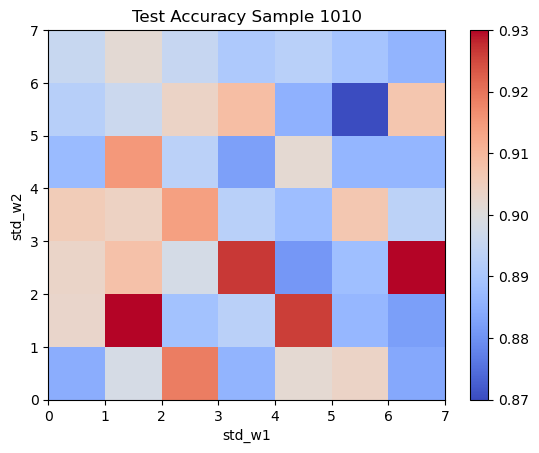

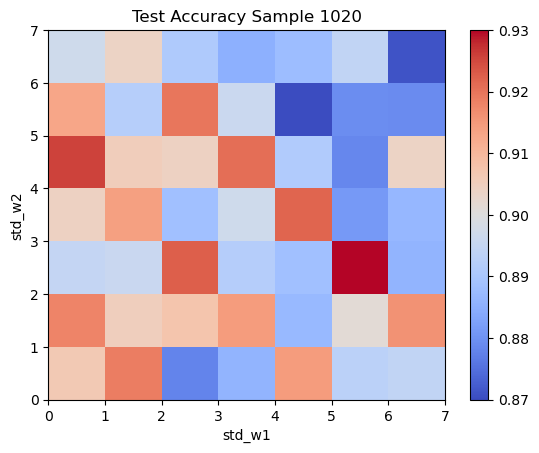

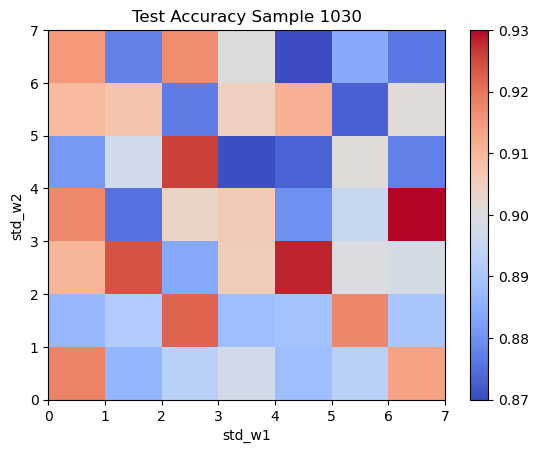

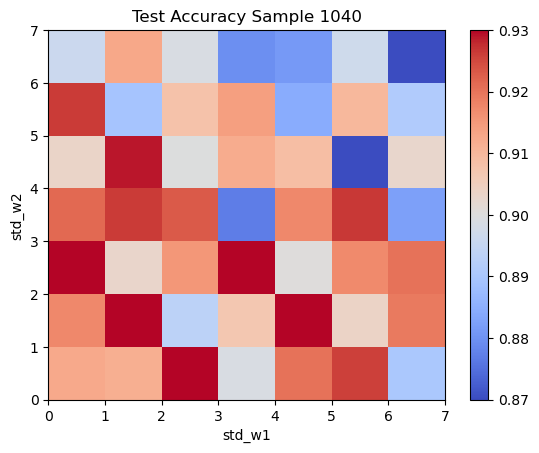

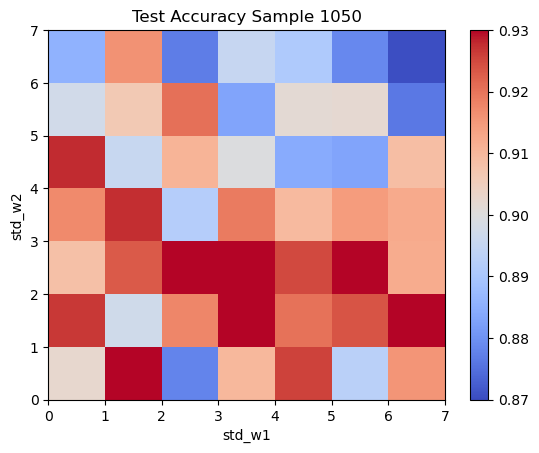

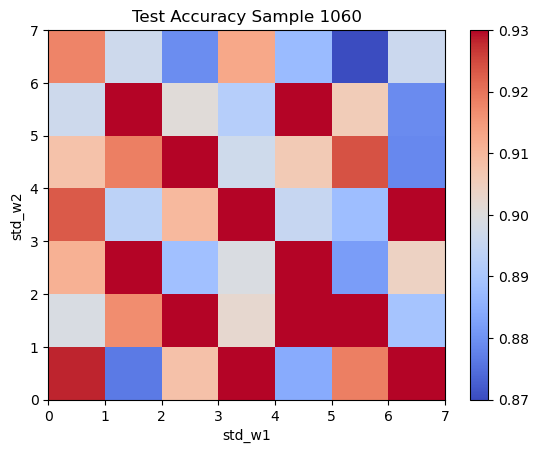

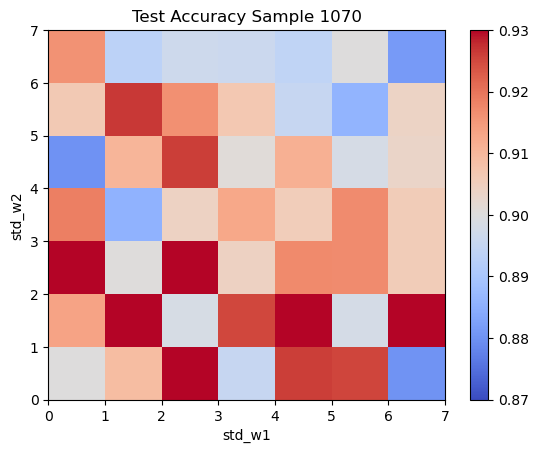

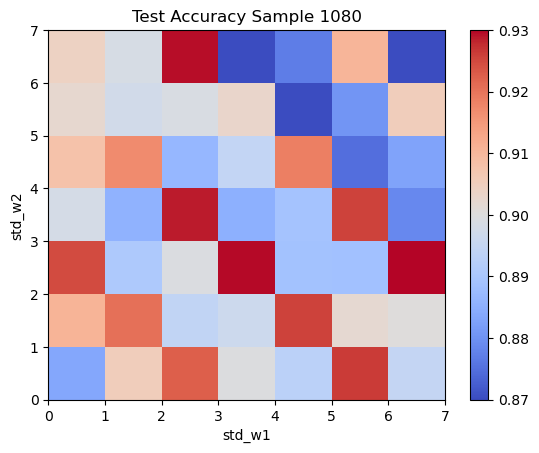

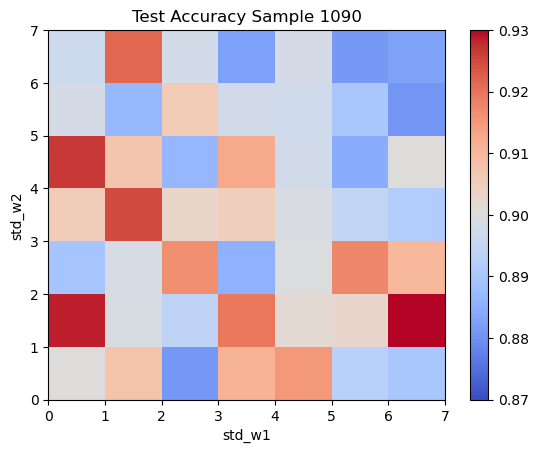

In [69]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(i))
    fig = plt.figure()
    ax = plt.axes()
    levels = np.linspace(0.87, 0.94, 10)
    b = ax.pcolormesh(data['test_accuracy_w1_w2'], cmap ='coolwarm', vmin=0.87, vmax=0.93)
    plt.colorbar(b)
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_title('Test Accuracy Sample {}'.format(sample))
    fig.savefig("test_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            test_accuracy_10_samples[i][j][k]= data['test_accuracy_w1_w2'][j][k]
    max_accuracy = np.max(test_accuracy_10_samples[i])
    index_max_accuracy = np.argmax(test_accuracy_10_samples[i])
    test_best_w1_w2 = np.unravel_index(index_max_accuracy, test_accuracy_10_samples[i].shape)
    test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005
    print(max_accuracy)



In [70]:
average_train_accuracy_grid_10_by_10_10_samples = np.mean(train_accuracy_10_samples, axis=0)
std_dev_train_accuracy_grid_10_by_10_10_samples = np.std(train_accuracy_10_samples, axis=0)

In [71]:
average_test_accuracy_grid_10_by_10_10_samples = np.mean(test_accuracy_10_samples, axis=0)
std_dev_test_accuracy_grid_10_by_10_10_samples = np.std(test_accuracy_10_samples, axis=0)

In [72]:
average_test_accuracy_grid_10_by_10_10_samples

array([[0.90579928, 0.90319511, 0.90547877, 0.90280449, 0.90597957,
        0.90588942, 0.90261418],
       [0.91017628, 0.91459335, 0.90796274, 0.90903446, 0.91630609,
        0.90963542, 0.90884415],
       [0.91131811, 0.90863381, 0.90892428, 0.90988582, 0.90793269,
        0.90920473, 0.91045673],
       [0.91341146, 0.90257412, 0.90559896, 0.90519832, 0.90217348,
        0.90357572, 0.9015625 ],
       [0.90484776, 0.90973558, 0.90793269, 0.89886819, 0.89875801,
        0.88933293, 0.89396034],
       [0.90264423, 0.90394631, 0.90565905, 0.89866787, 0.89570313,
        0.88874199, 0.8908153 ],
       [0.90201322, 0.90171274, 0.89780649, 0.88726963, 0.88525641,
        0.88868189, 0.8776242 ]])

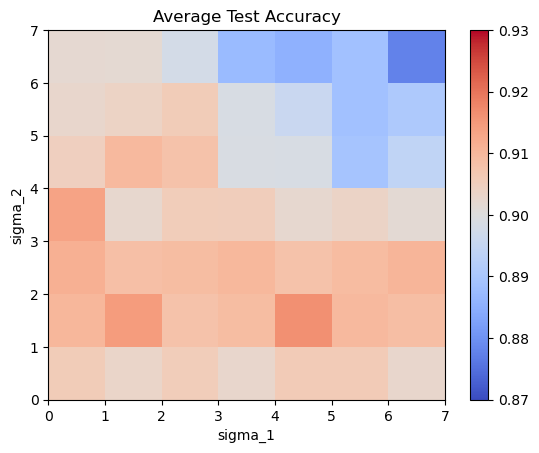

In [73]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(average_test_accuracy_grid_10_by_10_10_samples, cmap ='coolwarm', vmin= 0.87, vmax=0.93)
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("average_test_accuracy_grid_100_0.1.png".format(sample))

In [74]:
average_train_accuracy_grid_10_by_10_10_samples >= 0.999*np.max(average_train_accuracy_grid_10_by_10_10_samples)

array([[ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True]])

In [75]:
average_test_accuracy_grid_10_by_10_10_samples >= 0.999*np.max(average_test_accuracy_grid_10_by_10_10_samples)

array([[False, False, False, False, False, False, False],
       [False, False, False, False,  True, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

In [76]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_test_accuracy_grid_10_by_10_10_samples)
index_max_accuracy = np.argmax(average_test_accuracy_grid_10_by_10_10_samples)
test_best_w1_w2 = np.unravel_index(index_max_accuracy, average_test_accuracy_grid_10_by_10_10_samples.shape)

In [77]:
test_best_w1_w2

(1, 4)

In [78]:
test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005

In [79]:
test_best_w1_best_w2

array([0.0275, 0.0725])

In [80]:
array = np.array([[0.0575, 0.0125],
[0.0425, 0.1025],
[0.0425, 0.0875],
[0.0575, 0.1025],
[0.0275, 0.0275],
[0.0275, 0.0575],
[0.0575, 0.0575],
[0.0275, 0.0275],
[0.0425, 0.1025],
[0.0275, 0.1025]])

accuracy = np.array([0.9227764423076923,
0.9328926282051282
,0.9328926282051282
,0.9303886217948718
,0.9408052884615384
,0.9565304487179487
,0.9540264423076923
,0.9407051282051282
,0.9360977564102564
,0.932792467948718])

In [81]:
i=0
for (element, acc) in zip(array, accuracy):
    data = {}
    data['frequency'] = 65
    data['N'] = 100
    data['accuracy'] = acc
    data['w1'] = element[0]/0.3445
    data['error_bar_w1'] = 0.0075/0.3445
    data['w2'] = element[1]/0.3445
    data['error_bar_w2'] = 0.0075/0.3445
    np.savez("test_accuracy_100_seed_{}.npz".format(i),**data)
    i+=1

In [82]:
data = {}
data['frequency'] = 65
data['N'] = 100
data['accuracy'] = max_accuracy
data['w1'] = test_best_w1_best_w2[0]/0.3445
data['error_bar_w1'] = 0.0075/0.3445
data['w2'] = test_best_w1_best_w2[1]/0.3445
data['error_bar_w2'] = 0.0075/0.3445
np.savez("test_accuracy_100",**data)